In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
df_train = pd.read_csv('../ADMIN/Downloads/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('../ADMIN/Downloads/Google_Stock_Price_Test.csv')

In [78]:
df_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

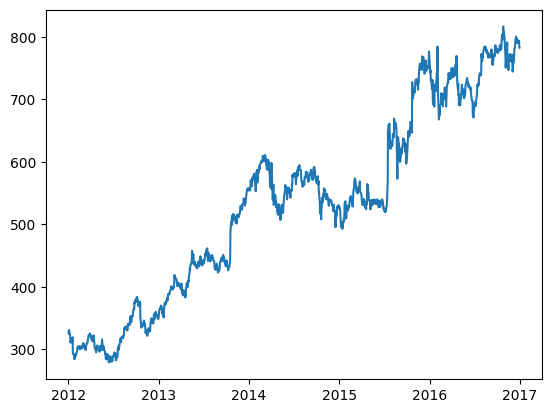

In [79]:
plt.plot(pd.to_datetime(df_train['Date']),df_train['Open'])

In [80]:
df_train['Volume']=df_train['Volume'].str.replace(',','').astype(float)
df_test['Volume']=df_test['Volume'].str.replace(',','').astype(float)

In [81]:
df_test['Volume']

0     1657300.0
1     1073000.0
2     1335200.0
3     1640200.0
4     1272400.0
5     1176800.0
6     1065900.0
7     1353100.0
8     1099200.0
9     1362100.0
10    1294400.0
11     919300.0
12    1670000.0
13    1963600.0
14    1474000.0
15    1494500.0
16    2973900.0
17    2965800.0
18    3246600.0
19    2160600.0
Name: Volume, dtype: float64

In [82]:
#X_test=df_test[['Open','High','Low','Volume']]
#X_test_scaled=scaler.transform(X_test)
              

In [83]:
#X_test_scaled.shape

In [84]:
df_train['Volume']

0        7380500.0
1        5749400.0
2        6590300.0
3        5405900.0
4       11688800.0
           ...    
1253      623400.0
1254      789100.0
1255     1153800.0
1256      744300.0
1257     1770000.0
Name: Volume, Length: 1258, dtype: float64

In [85]:
X = df_train[['Open','High','Low','Volume']]

In [86]:
X

,Open,High,Low,Volume
0,325.25,332.83,324.97,7380500.0
1,331.27,333.87,329.08,5749400.0
2,329.83,330.75,326.89,6590300.0
3,328.34,328.77,323.68,5405900.0
4,322.04,322.29,309.46,11688800.0
...,...,...,...,...
1253,790.90,792.74,787.28,623400.0
1254,790.68,797.86,787.66,789100.0
1255,793.70,794.23,783.20,1153800.0
1256,783.33,785.93,778.92,744300.0


In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
X_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

In [90]:
X_scaled.shape

(1258, 4)

In [91]:
#Xrow = X_scaled[0:60,0]
#ya = X_scaled[60,0]

In [92]:
import numpy as np
XROWS = []
Ya = []
for i in range(1198):
    XROWS.append(X_scaled[i:60+i])
    
    
    Ya.append(X_scaled[60+i,0])
X_train = np.array(XROWS)
y_train = np.array(Ya)

X_train.shape, y_train.shape

((1198, 60, 4), (1198,))

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [114]:
model = Sequential()
model.add(LSTM(75, input_shape=(60,4), return_sequences=True))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(75, return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error')

In [115]:
hist = model.fit(X_train,y_train, epochs=40, batch_size=32)

Epoch 1/40
38/38 [==============================] - 16s 163ms/step - loss: 0.0357
Epoch 2/40
38/38 [==============================] - 6s 169ms/step - loss: 0.0118
Epoch 3/40
38/38 [==============================] - 6s 166ms/step - loss: 0.0095
Epoch 4/40
38/38 [==============================] - 6s 167ms/step - loss: 0.0066
Epoch 5/40
38/38 [==============================] - 6s 165ms/step - loss: 0.0065
Epoch 6/40
38/38 [==============================] - 6s 161ms/step - loss: 0.0056
Epoch 7/40
38/38 [==============================] - 6s 166ms/step - loss: 0.0047
Epoch 8/40
38/38 [==============================] - 6s 165ms/step - loss: 0.0057
Epoch 9/40
38/38 [==============================] - 6s 170ms/step - loss: 0.0042
Epoch 10/40
38/38 [==============================] - 6s 162ms/step - loss: 0.0046
Epoch 11/40
38/38 [==============================] - 6s 165ms/step - loss: 0.0043
Epoch 12/40
38/38 [==============================] - 6s 167ms/step - loss: 0.0041
Epoch 13/40
38/38 [=====

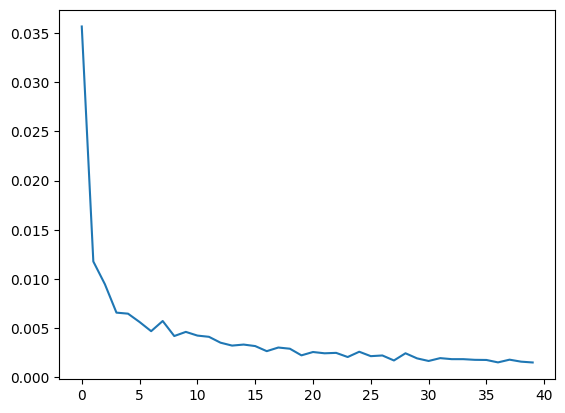

In [116]:
plt.plot(hist.history['loss'])

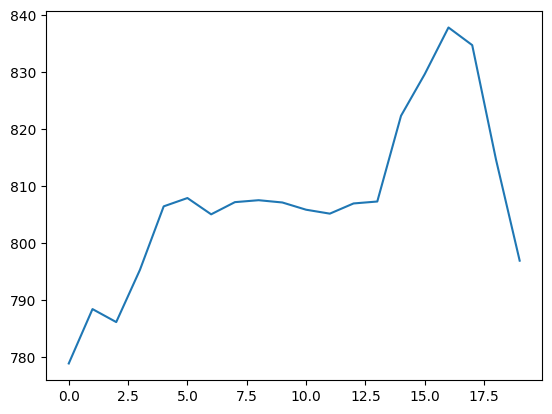

In [117]:
plt.plot(df_test['Open'])

In [118]:
#X_scaled = scaler.transform(X)

In [119]:
df_test[['Open','High','Low','Volume']]

,Open,High,Low,Volume
0,778.81,789.63,775.80,1657300.0
1,788.36,791.34,783.16,1073000.0
2,786.08,794.48,785.02,1335200.0
3,795.26,807.90,792.20,1640200.0
4,806.40,809.97,802.83,1272400.0
5,807.86,809.13,803.51,1176800.0
6,805.00,808.15,801.37,1065900.0
7,807.14,807.39,799.17,1353100.0
8,807.48,811.22,806.69,1099200.0
9,807.08,807.14,800.37,1362100.0


In [120]:
#df_test=df_test[['Open','High','Low','Volume']]
X_test_scaled=scaler.transform(df_test[['Open','High','Low','Volume']])
X_test_scaled.shape
#X_test_scaled

(20, 4)

In [121]:
X_test_temp = np.vstack([X_scaled[-60:],X_test_scaled])
X_test_temp

array([[0.9299055 , 0.93239584, 0.9439309 , 0.04256308],
       [0.93113327, 0.93086447, 0.93485755, 0.03705647],
       [0.92750577, 0.94901675, 0.94455599, 0.04673608],
       [0.94415507, 0.95443255, 0.9534778 , 0.05464958],
       [0.93876032, 0.94668235, 0.95628125, 0.03722467],
       [0.93403527, 0.9337778 , 0.93911956, 0.05436123],
       [0.93483518, 0.93887613, 0.94480224, 0.03382459],
       [0.9313937 , 0.94242441, 0.94764358, 0.04345615],
       [0.94636878, 0.9718565 , 0.96292999, 0.08205847],
       [0.96569685, 0.97744038, 0.98653205, 0.07044053],
       [0.97510976, 0.97626384, 0.9827436 , 0.07006808],
       [0.95966962, 0.96791604, 0.97889832, 0.05039247],
       [0.97808617, 0.99719872, 0.99939385, 0.0676652 ],
       [1.        , 1.        , 1.        , 0.06281538],
       [0.98076494, 0.98188507, 0.98329292, 0.0656708 ],
       [0.97083116, 0.97536743, 0.97416275, 0.10978374],
       [0.98450406, 0.99777765, 0.97812169, 0.17068482],
       [0.96054394, 0.96298579,

In [122]:
XROWS = []
for i in range(20):
   # Xrow = X_scaled[i:60+i]
    XROWS.append(X_test_temp[i:60+i])
X_test_final = np.array(XROWS)

X_test_final.shape


(20, 60, 4)

In [123]:
yp = model.predict(X_test_final)
scaler.scale_


1/1 [==============================] - 2s 2s/step


array([1.86025746e-03, 1.86751825e-03, 1.89422640e-03, 4.00480577e-08])

In [124]:
inv=1/1.86025746e-03
inv

537.5599998937781

In [125]:
yp=yp*inv
yp

array([[495.07092],
       [493.56378],
       [492.08093],
       [490.89703],
       [490.39203],
       [490.8706 ],
       [492.28937],
       [494.33038],
       [496.62164],
       [498.9771 ],
       [501.1266 ],
       [502.89688],
       [504.2618 ],
       [505.22995],
       [505.991  ],
       [506.97052],
       [508.5289 ],
       [510.75128],
       [513.393  ],
       [515.54297]], dtype=float32)

In [126]:
#y = scaler.inverse_transform(yp)



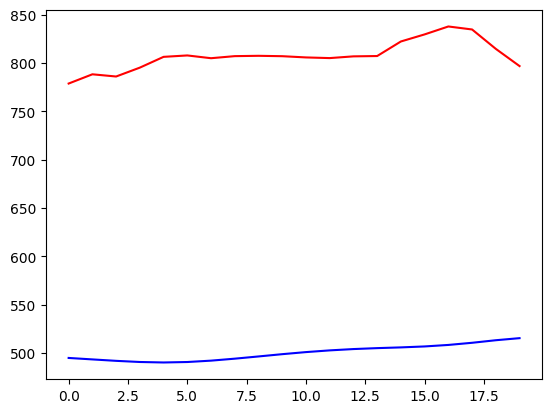

In [128]:
plt.plot(df_test['Open'], c='red')
plt.plot(yp,c='blue')